In [1]:
# import the necessary pacakges

import pandas as pd
from pandas import Series, DataFrame 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
!pip install pandas-datareader

In [3]:
# from pandas.io.data import DataReader

In [4]:
from pandas_datareader import data as pdr, wb

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [9]:
!pip install yfinance

In [10]:
import yfinance as yf
yf.pdr_override()
    
lt = []
for stock in tech_list:
    #globals()[stock] = data.DataReader(stock, 'yahoo', start, end)
    temp_df = pdr.get_data_yahoo(stock, start, end)
    temp_df = temp_df.reset_index()
    lt.append(temp_df)

df = pd.concat([lt[0], lt[1], lt[2], lt[3]], axis=0)
df = df.reset_index(drop=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  173.039993  175.860001  172.149994  175.639999  174.626495   
1 2021-12-23  175.850006  176.850006  175.270004  176.279999  175.262802   
2 2021-12-27  177.089996  180.419998  177.070007  180.330002  179.289459   
3 2021-12-28  180.160004  181.330002  178.529999  179.289993  178.255447   
4 2021-12-29  179.330002  180.630005  178.139999  179.380005  178.344925   

     Volume  
0  92135300  
1  68356600  
2  74919600  
3  79144300  
4  62348900  


In [11]:
AAPL = lt[0]
GOOG = lt[1]
MSFT = lt[2]
AMZN = lt[3]

In [12]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-22,169.270004,172.050003,168.500504,171.037003,171.037003,55036000
1,2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2,2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
3,2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
4,2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000


In [13]:
AMZN.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900
248,2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000
249,2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500
250,2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300
251,2022-12-21,86.180000,87.230003,85.209999,86.769997,86.769997,59185400


In [14]:
print(GOOG.head())
print('')
print(MSFT.head())
print('')
print(AMZN.head())
print('')


        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  144.100006  147.302994  143.962997  146.949005  146.949005   
1 2021-12-23  147.089493  148.572601  146.950851  147.142502  147.142502   
2 2021-12-27  147.463501  148.426498  147.250000  148.063995  148.063995   
3 2021-12-28  148.374496  148.374496  145.935501  146.447998  146.447998   
4 2021-12-29  146.429504  147.183746  145.504501  146.504501  146.504501   

     Volume  
0  18438000  
1  13818000  
2  13256000  
3  18624000  
4  17022000  

        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  328.299988  333.609985  325.750000  333.200012  330.106873   
1 2021-12-23  332.750000  336.390015  332.730011  334.690002  331.583038   
2 2021-12-27  335.459991  342.480011  335.429993  342.450012  339.270996   
3 2021-12-28  343.149994  343.809998  340.320007  341.250000  338.082092   
4 2021-12-29  341.299988  344.299988  339.679993  341.950012  338.775635   

 

<AxesSubplot:>

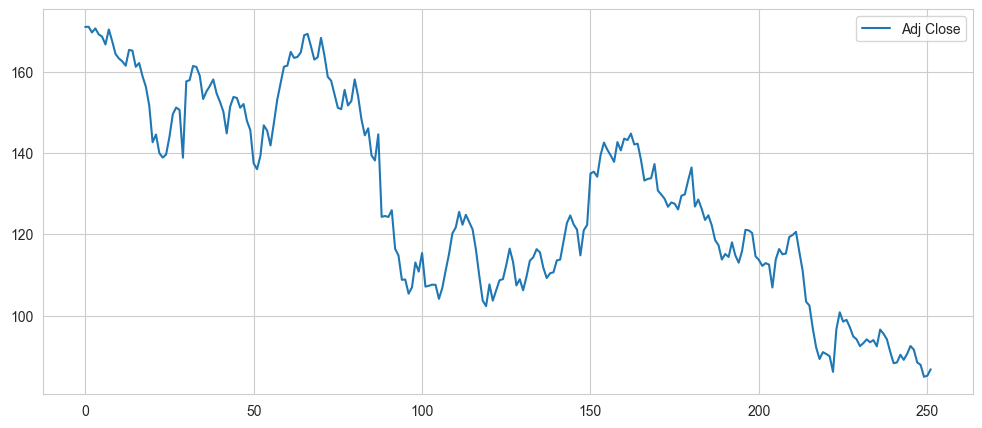

In [15]:
AMZN['Adj Close'].plot(legend = True, figsize = (12,5))

In [16]:
# Q. What are the conclusions that can be drawn from the given graph?

<AxesSubplot:>

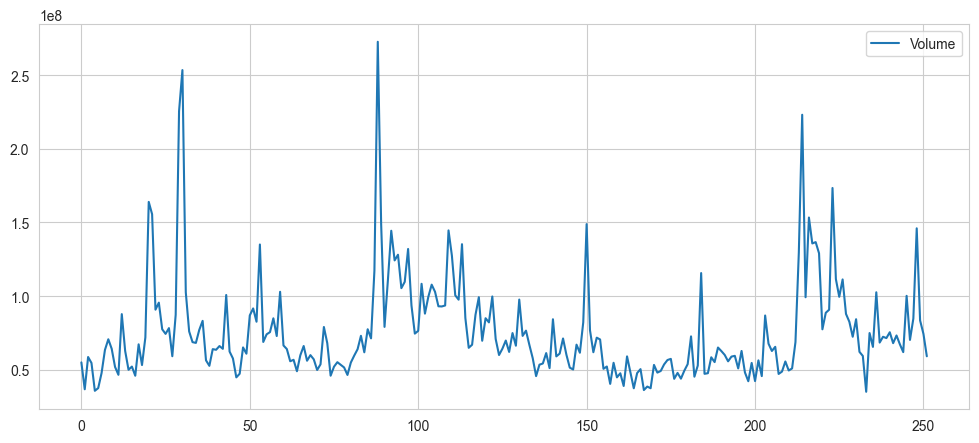

In [17]:
AMZN['Volume'].plot(legend = True, figsize = (12,5))

In [18]:
# Q. What are the conclusions that can be drawn from the given graph?

In [19]:
# Calculating moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()

<AxesSubplot:>

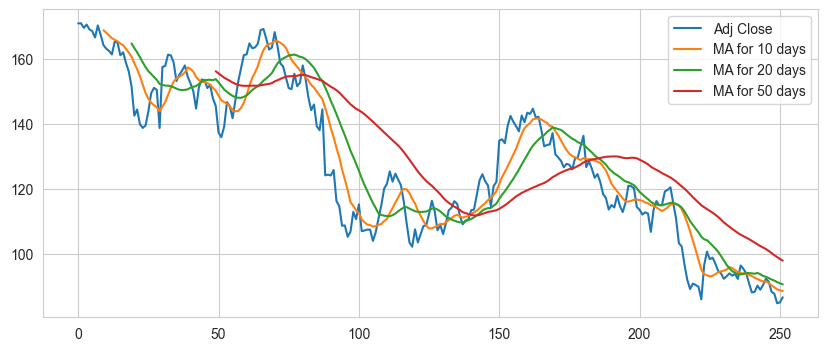

In [20]:
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

In [21]:
# Q. What are the conclusions that can be drawn from the given graph?

<AxesSubplot:>

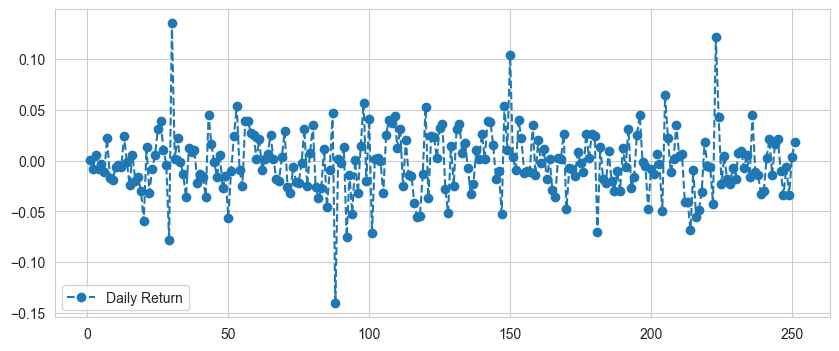

In [22]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

AMZN['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

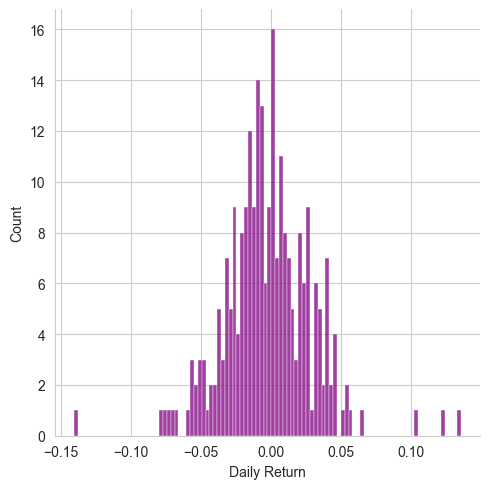

In [23]:
sns.displot(AMZN['Daily Return'].dropna(), bins = 100, color = 'purple')

In [24]:
# Q. Draw the conclusions for the rest 3 companies